In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

In [9]:
boston = mglearn.datasets.load_boston()

In [15]:
x = torch.from_numpy(boston['data']).float()
y = torch.from_numpy(boston['target']).float().reshape(-1, 1)
x.shape, y.shape

(torch.Size([506, 13]), torch.Size([506, 1]))

In [22]:
n_epochs = 5000
lr = 1e-3
print_interval = 100

In [23]:
model = nn.Linear(x.shape[-1], y.shape[-1])
print(model)

Linear(in_features=13, out_features=1, bias=True)


In [24]:
opt = optim.Adam(model.parameters(), lr=lr)

In [25]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
    opt.zero_grad()
    loss.backward()
    opt.step()

    if (i+1) % print_interval == 0:
        print(f'Epoch {i+1}: loss={loss:.4f}')

Epoch 100: loss=336.1214
Epoch 200: loss=209.0271
Epoch 300: loss=147.9628
Epoch 400: loss=113.2917
Epoch 500: loss=95.9201
Epoch 600: loss=87.4128
Epoch 700: loss=82.7478
Epoch 800: loss=79.6126
Epoch 900: loss=77.1161
Epoch 1000: loss=74.9417
Epoch 1100: loss=72.9672
Epoch 1200: loss=71.1330
Epoch 1300: loss=69.4041
Epoch 1400: loss=67.7588
Epoch 1500: loss=66.1846
Epoch 1600: loss=64.6740
Epoch 1700: loss=63.2232
Epoch 1800: loss=61.8295
Epoch 1900: loss=60.4912
Epoch 2000: loss=59.2068
Epoch 2100: loss=57.9748
Epoch 2200: loss=56.7939
Epoch 2300: loss=55.6630
Epoch 2400: loss=54.5807
Epoch 2500: loss=53.5462
Epoch 2600: loss=52.5584
Epoch 2700: loss=51.6164
Epoch 2800: loss=50.7195
Epoch 2900: loss=49.8665
Epoch 3000: loss=49.0564
Epoch 3100: loss=48.2881
Epoch 3200: loss=47.5600
Epoch 3300: loss=46.8705
Epoch 3400: loss=46.2179
Epoch 3500: loss=45.6001
Epoch 3600: loss=45.0150
Epoch 3700: loss=44.4603
Epoch 3800: loss=43.9336
Epoch 3900: loss=43.4325
Epoch 4000: loss=42.9546
Epoch

In [30]:
result_df = pd.DataFrame(torch.concat([y, y_hat], dim=1).detach_().numpy(), columns=['y', 'y_hat'])
result_df

,y,y_hat
0,24.000000,28.761158
1,21.600000,25.611952
2,34.700001,28.495325
3,33.400002,28.388178
4,36.200001,27.640139
...,...,...
501,22.400000,25.316631
502,20.600000,26.093628
503,23.900000,31.037329
504,22.000000,29.916840


c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

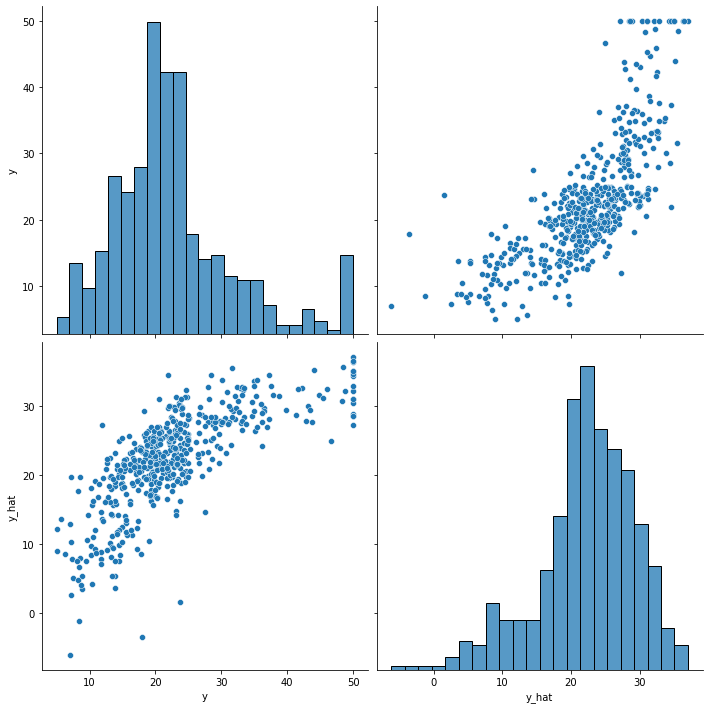

In [31]:
sns.pairplot(result_df, height=5)
plt.show()